# [Dirty data to clean What"s wrong with this dataset](https://www.kaggle.com/datasets/joannanplkrk/dirty-data-to-clean-whats-wrong-with-this-dataset)

In [1]:
!pip install pandas numpy matplotlib seaborn folium

  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached xyzservices-2025.4.0-py3-none-any.whl.metadata (4.3 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached xyzservices-2025.4.0-py3-none-any.whl (90 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [folium]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Marker, Map
from folium.plugins import HeatMap

In [3]:
df = pd.read_csv("wrecked_data/animal_data_dirty1.csv", sep=';')
df

,Animal type,Country,Weight kg,Body Length cm,Gender,Animal code,Latitude,Longitude,Animal name,Observation date,Data compiled by
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03.01.2024,James Johnson
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03.02.2024,James Johnson
2,European bison,Poland,930.000,335.0,male,NaN,52.828845,23.820144,Szefu,01.03.2024,Anne Anthony
3,European bison,Poland,909.000,311.0,not determined,NaN,52.830509,23.826849,NaN,01.03.2024,Anne Anthony
4,European bison™,Poland,581.000,277.0,female,NaN,52.834109,23.807093,NaN,01.03.2024,Anne Anthony
...,...,...,...,...,...,...,...,...,...,...,...
1006,red squirrel,Poland,0.346,20.0,female,NaN,52.212001,21.033187,Lola,7 May 2024,Anne Anthony
1007,hedgehog,Germany,1.000,23.0,female,NaN,49.561356,11.105334,NaN,7 May 2024,Bob Bobson
1008,hedgehog,Germany,0.500,17.0,female,NaN,49.561569,11.087046,NaN,7 May 2024,Bob Bobson
1009,red squirrel,Poland,0.346,20.0,female,NaN,52.212001,21.033187,Lola,7 May 2024,Anne Anthony


In [4]:
df.describe()

,Weight kg,Body Length cm,Animal code,Latitude,Longitude
count,984.000000,984.000000,0.0,913.000000,913.000000
mean,39.745503,39.107724,NaN,49.393369,18.203280
std,156.290076,58.628601,NaN,7.168900,3.899601
min,-0.252000,-19.000000,NaN,-78.582973,11.074008
25%,0.293000,19.000000,NaN,48.186913,14.384559
50%,0.331500,21.000000,NaN,49.560723,18.944015
75%,0.800000,23.000000,NaN,52.212433,21.033243
max,1100.000000,350.000000,NaN,52.853843,34.896734


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Animal type       991 non-null    object 
 1   Country           999 non-null    object 
 2   Weight kg         984 non-null    float64
 3   Body Length cm    984 non-null    float64
 4   Gender            992 non-null    object 
 5   Animal code       0 non-null      float64
 6   Latitude          913 non-null    float64
 7   Longitude         913 non-null    float64
 8   Animal name       52 non-null     object 
 9   Observation date  1011 non-null   object 
 10  Data compiled by  1011 non-null   object 
dtypes: float64(5), object(6)
memory usage: 87.0+ KB


## Dropping

In [6]:
df = df.drop(columns=["Animal code", "Animal name"])
df = df.dropna()
df = df.drop_duplicates()
df

,Animal type,Country,Weight kg,Body Length cm,Gender,Latitude,Longitude,Observation date,Data compiled by
2,European bison,Poland,930.000,335.0,male,52.828845,23.820144,01.03.2024,Anne Anthony
3,European bison,Poland,909.000,311.0,not determined,52.830509,23.826849,01.03.2024,Anne Anthony
4,European bison™,Poland,581.000,277.0,female,52.834109,23.807093,01.03.2024,Anne Anthony
5,European bisson,Poland,900.000,295.0,male,52.834759,23.817201,01.03.2024,Anne Anthony
6,European buster,Poland,620.000,250.0,female,52.834960,23.820750,01.03.2024,Anne Anthony
...,...,...,...,...,...,...,...,...,...
1005,hedgehog,Hungary,0.900,23.0,male,47.510055,18.944356,7 May 2024,Anne Anthony
1006,red squirrel,Poland,0.346,20.0,female,52.212001,21.033187,7 May 2024,Anne Anthony
1007,hedgehog,Germany,1.000,23.0,female,49.561356,11.105334,7 May 2024,Bob Bobson
1008,hedgehog,Germany,0.500,17.0,female,49.561569,11.087046,7 May 2024,Bob Bobson


## Renaming

In [7]:
df["Animal type"].unique()

array(['European bison', 'European bison™', 'European bisson',
       'European buster', 'lynx', 'lynx?', 'red squirel', 'red squirrel',
       'red squirrell', 'hedgehog', 'wedgehod', 'ledgehod'], dtype=object)

In [8]:
df["Country"].unique()

array(['Poland', 'Hungary', 'PL', 'Slovakia', 'Czech Republic', 'Czech',
       'Hungry', 'HU', 'Germany', 'Australia', 'Austria', 'CZ', 'DE',
       'CC'], dtype=object)

In [9]:
df["Observation date"].unique()

array(['01.03.2024', '02.03.2024', '03.03.2024', '04.03.2024',
       '05.03.2024', '06.03.2024', '07.03.2024', '08.03.2024',
       '09.03.2024', '10.03.2024', '11.03.2024', '12.03.2024',
       '13.03.2024', '14.03.2024', '15.03.2024', '16.03.2024',
       '17.03.2024', '18.03.2024', '19.03.2024', '20.03.2024',
       '21.03.2024', '22.03.2024', '23.03.2024', '24.03.2024',
       '25.03.2024', '26.03.2024', '27.03.2024', '28.03.2024',
       '29.03.2024', '30.03.2024', '31.03.2024', '01.04.2024',
       '02.04.2024', '03.04.2024', '04.04.2024', '05.04.2024',
       '06.04.2024', '07.04.2024', '08.04.2024', '09.04.2024',
       '10.04.2024', '11.04.2024', '12.04.2024', '13.04.2024',
       '14.04.2024', '15.04.2024', '16.04.2024', '17.04.2024',
       '18.04.2024', '19.04.2024', '20.04.2024', '21.04.2024',
       '22.04.2024', '23.04.2024', '24.04.2024', '25.04.2024',
       '26.04.2024', '27.04.2024', '28.04.2024', '29.04.2024',
       '30.04.2024', '09.05.2024', '10.05.2024', '11.05

In [10]:
df["Animal type"] = df["Animal type"].replace({
    "European bison™": "European bison",
    "European bisson": "European bison", 
    "European buster": "European bison",
    "lynx?": "lynx",
    "red squirrel": "red squirel",
    "red squirrell": "red squirel",
    "wedgehod": "hedgehog",
    "ledgehod": "hedgehog"
})

df["Country"] = df["Country"].replace({
    "PL": "Poland",
    "Hungry": "Hungary",
    "HU": "Hungary",
    "Slovakia": "Slovakia",
    "Czech": "Czech Republic",
    "CZ": "Czech Republic",
    "DE": "Germany",
    "CC": "Australia"
})

# df["Gender"] = df["Gender"].replace("not determined", None)

df["Observation date"] = df["Observation date"].replace({
    "1 May 2024": "01.05.2024",
    "2 may 2024": "02.05.2024",
    "3 May 2024": "03.05.2024",
    "4 May 2024": "04.05.2024",
    "5 May 2024": "05.05.2024",
    "6 May 2024": "06.05.2024",
    "7 May 2024": "07.05.2024",
    "8 May 2024": "08.05.2024"
})

df["Observation date"] = pd.to_datetime(df["Observation date"], dayfirst=True, errors='coerce')

df

,Animal type,Country,Weight kg,Body Length cm,Gender,Latitude,Longitude,Observation date,Data compiled by
2,European bison,Poland,930.000,335.0,male,52.828845,23.820144,2024-03-01,Anne Anthony
3,European bison,Poland,909.000,311.0,not determined,52.830509,23.826849,2024-03-01,Anne Anthony
4,European bison,Poland,581.000,277.0,female,52.834109,23.807093,2024-03-01,Anne Anthony
5,European bison,Poland,900.000,295.0,male,52.834759,23.817201,2024-03-01,Anne Anthony
6,European bison,Poland,620.000,250.0,female,52.834960,23.820750,2024-03-01,Anne Anthony
...,...,...,...,...,...,...,...,...,...
1005,hedgehog,Hungary,0.900,23.0,male,47.510055,18.944356,2024-05-07,Anne Anthony
1006,red squirel,Poland,0.346,20.0,female,52.212001,21.033187,2024-05-07,Anne Anthony
1007,hedgehog,Germany,1.000,23.0,female,49.561356,11.105334,2024-05-07,Bob Bobson
1008,hedgehog,Germany,0.500,17.0,female,49.561569,11.087046,2024-05-07,Bob Bobson


## Handling data

In [11]:
df.loc[df["Weight kg"] < 0, "Weight kg"] *= -1
df.loc[df["Body Length cm"] < 0, "Body Length cm"] *= -1


## Data visualization

<Axes: xlabel='Animal type', ylabel='count'>

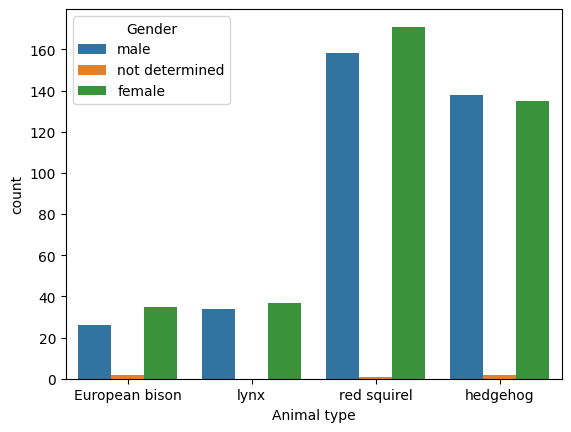

In [12]:
sns.countplot(x ="Animal type", hue = "Gender", data = df)

<Axes: xlabel='Data compiled by', ylabel='count'>

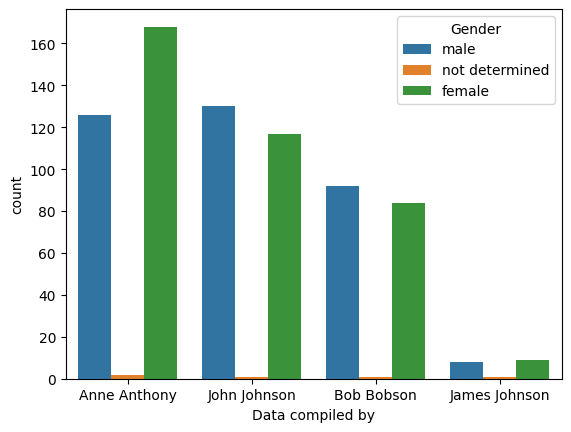

In [13]:
sns.countplot(x ="Data compiled by", hue = "Gender", data = df)

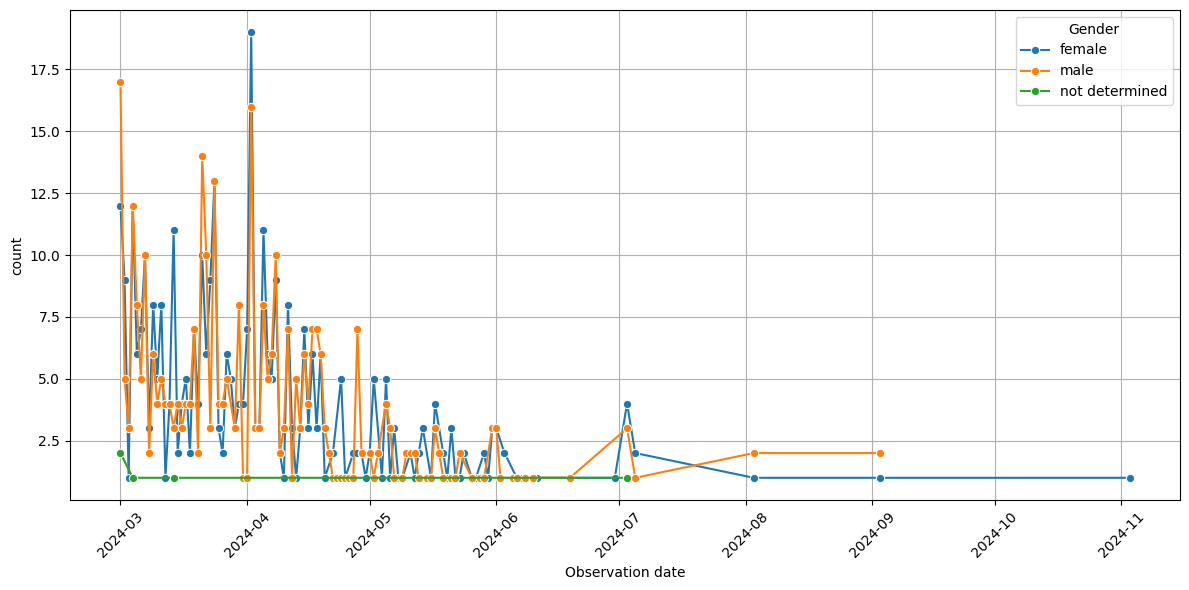

In [14]:
count_df = df.groupby(['Observation date', 'Gender']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Observation date', y='count', hue="Gender", data=count_df, marker='o')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

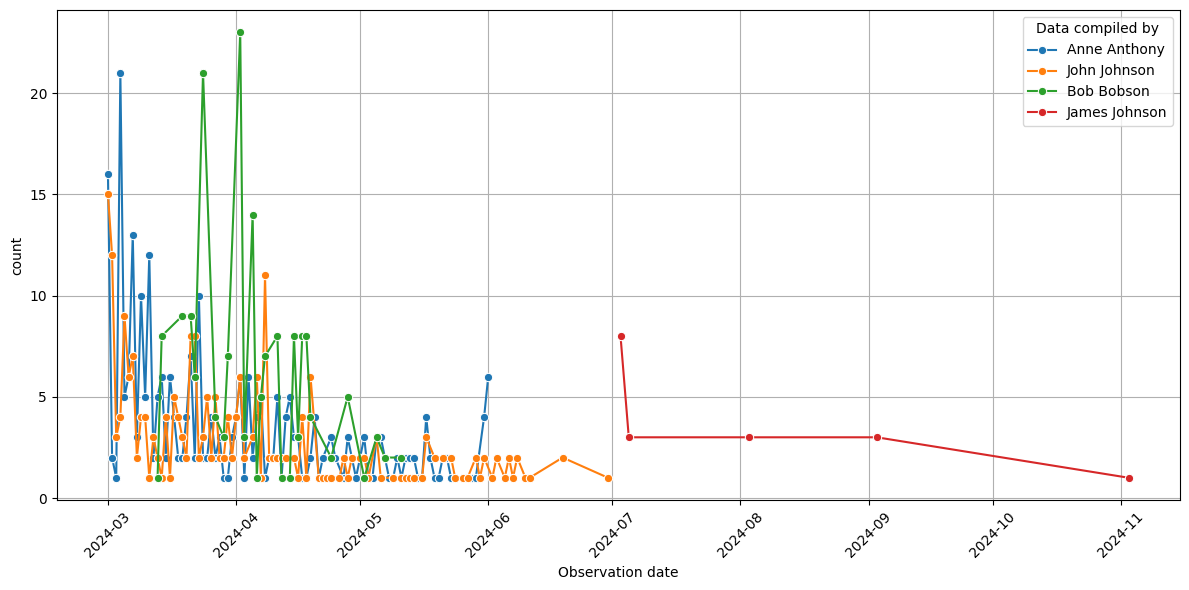

In [15]:
count_df = df.groupby(['Observation date', 'Data compiled by']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Observation date', y='count', hue="Data compiled by", data=count_df, marker='o')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='Animal type', ylabel='count'>

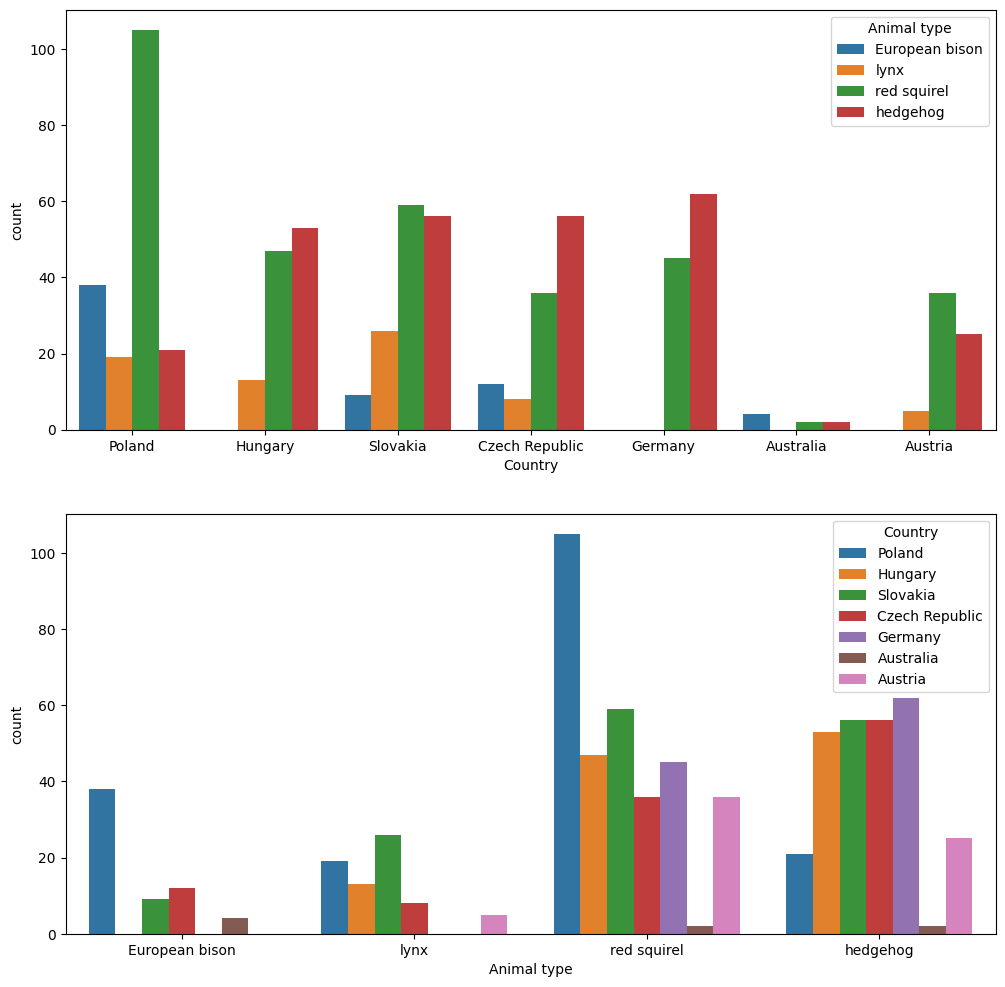

In [16]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
sns.countplot(x ="Country", hue = "Animal type", data = df)
plt.subplot(2, 1, 2)
sns.countplot(x ="Animal type", hue = "Country", data = df)

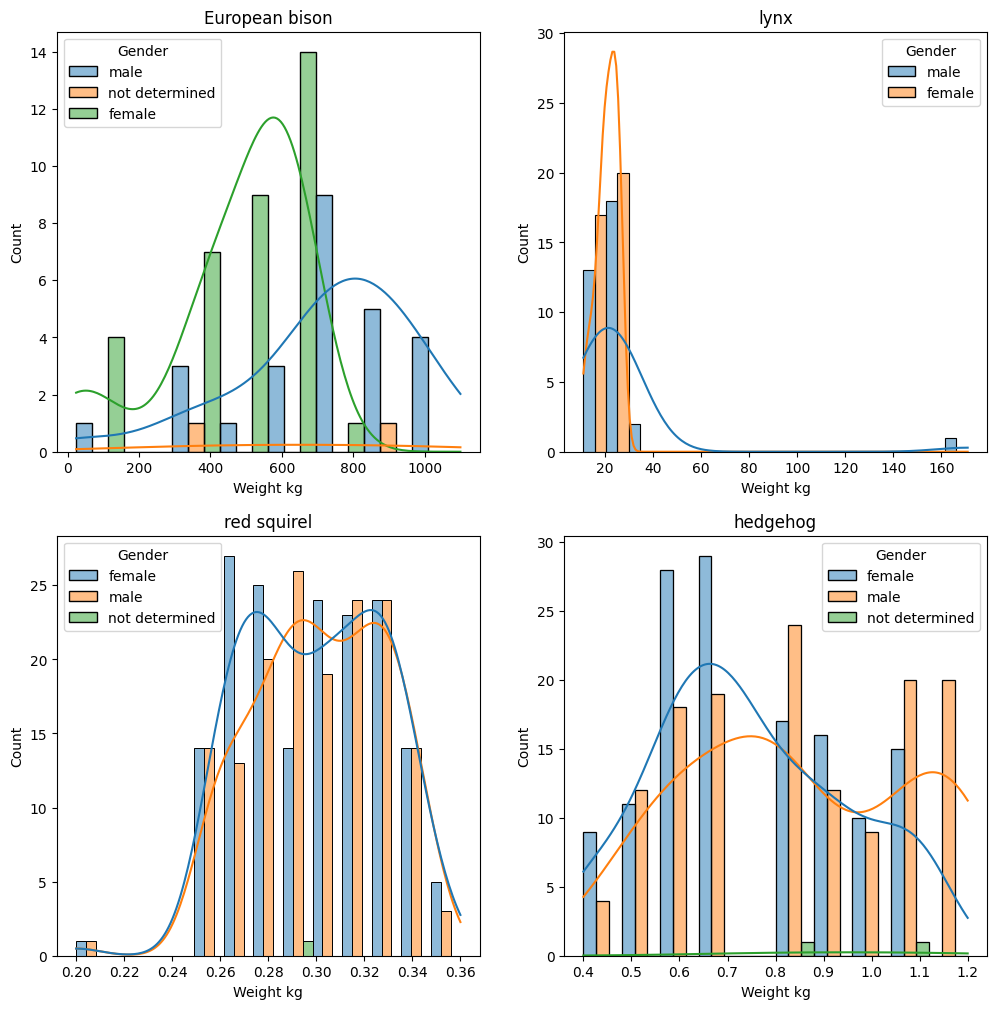

In [17]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title("European bison")
sns.histplot(data=df[df["Animal type"] == "European bison"], x="Weight kg", hue="Gender", multiple="dodge", kde=True)
plt.subplot(2, 2, 2)
plt.title("lynx")
sns.histplot(data=df[df["Animal type"] == "lynx"], x="Weight kg", hue="Gender", multiple="dodge", kde=True)
plt.subplot(2, 2, 3)
plt.title("red squirel")
sns.histplot(data=df[df["Animal type"] == "red squirel"], x="Weight kg", hue="Gender", multiple="dodge", kde=True)
plt.subplot(2, 2, 4)
plt.title("hedgehog")
sns.histplot(data=df[df["Animal type"] == "hedgehog"], x="Weight kg", hue="Gender", multiple="dodge", kde=True)
plt.show()

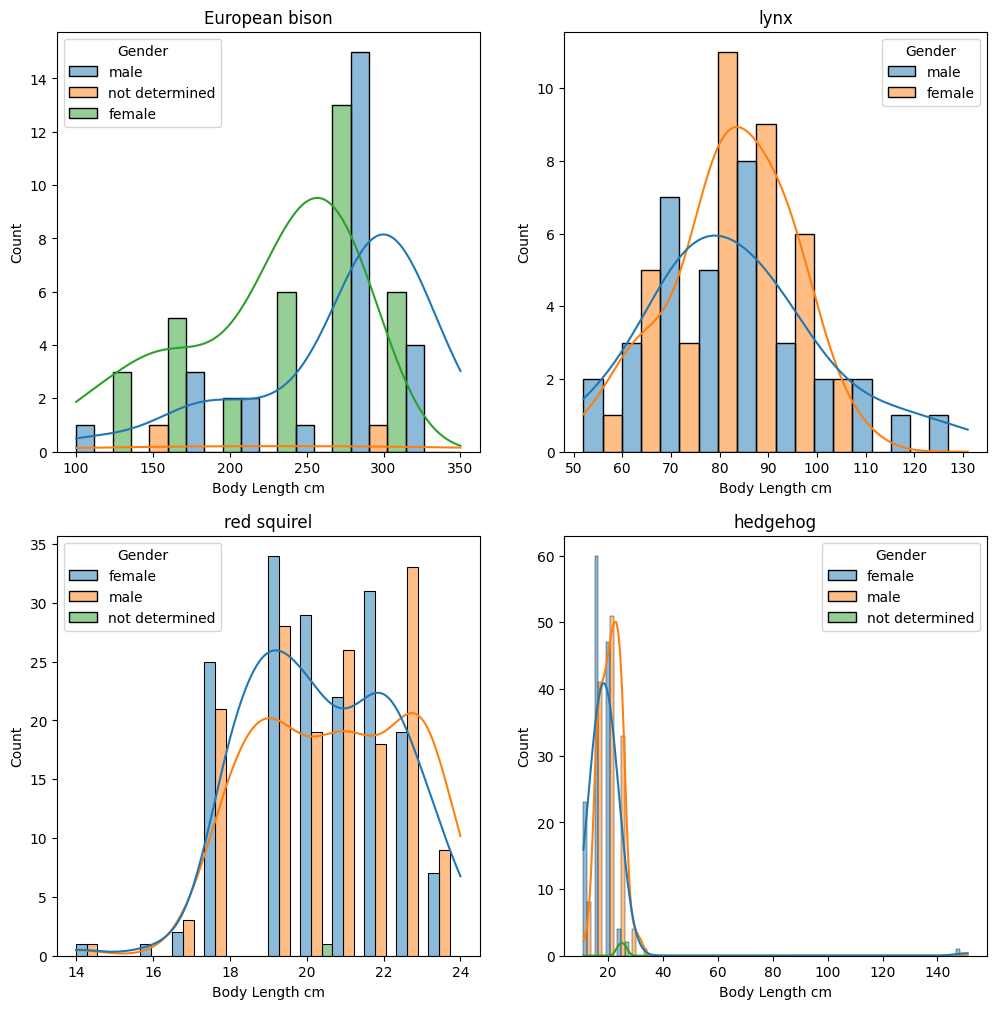

In [18]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title("European bison")
sns.histplot(data=df[df["Animal type"] == "European bison"], x="Body Length cm", hue="Gender", multiple="dodge", kde=True)
plt.subplot(2, 2, 2)
plt.title("lynx")
sns.histplot(data=df[df["Animal type"] == "lynx"], x="Body Length cm", hue="Gender", multiple="dodge", kde=True)
plt.subplot(2, 2, 3)
plt.title("red squirel")
sns.histplot(data=df[df["Animal type"] == "red squirel"], x="Body Length cm", hue="Gender", multiple="dodge", kde=True)
plt.subplot(2, 2, 4)
plt.title("hedgehog")
sns.histplot(data=df[df["Animal type"] == "hedgehog"], x="Body Length cm", hue="Gender", multiple="dodge", kde=True)
plt.show()

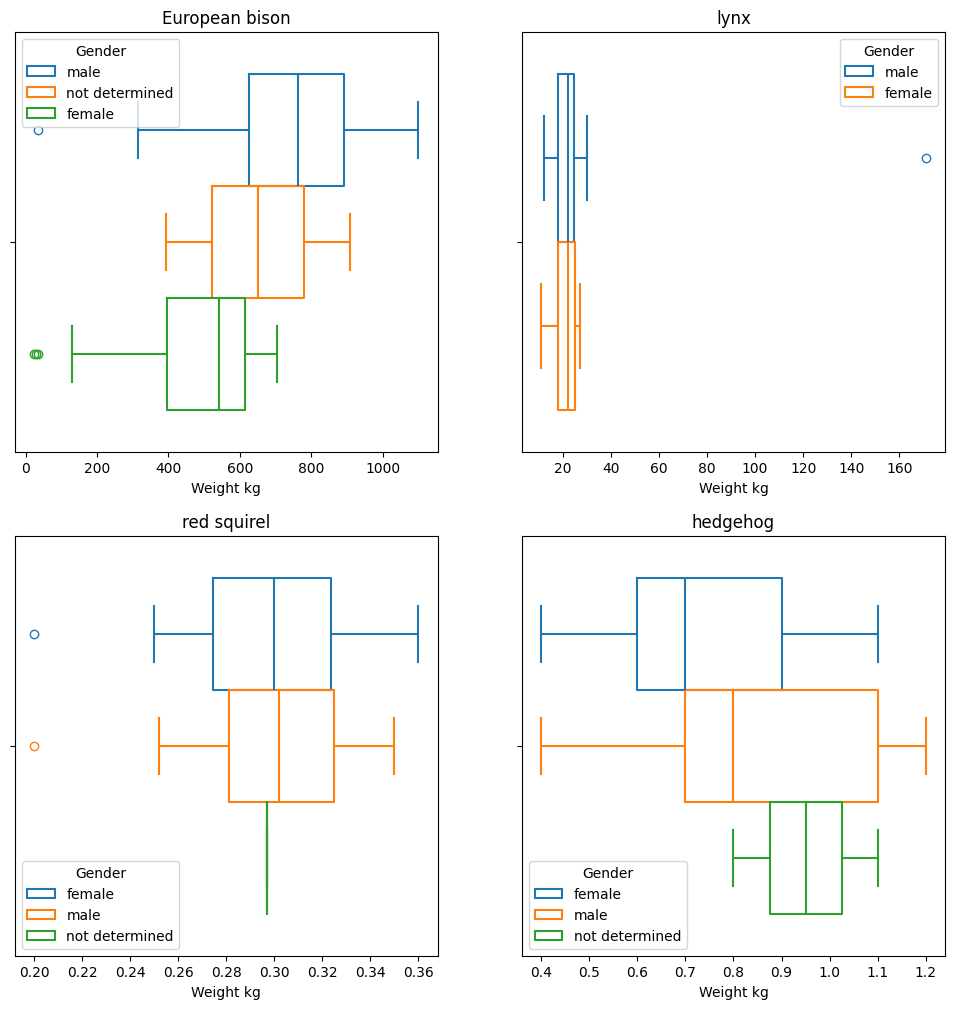

In [19]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title("European bison")
sns.boxplot(data=df[df["Animal type"] == "European bison"], x="Weight kg", hue="Gender", fill=False)
plt.subplot(2, 2, 2)
plt.title("lynx")
sns.boxplot(data=df[df["Animal type"] == "lynx"], x="Weight kg", hue="Gender", fill=False)
plt.subplot(2, 2, 3)
plt.title("red squirel")
sns.boxplot(data=df[df["Animal type"] == "red squirel"], x="Weight kg", hue="Gender", fill=False)
plt.subplot(2, 2, 4)
plt.title("hedgehog")
sns.boxplot(data=df[df["Animal type"] == "hedgehog"], x="Weight kg", hue="Gender", fill=False)
plt.show()

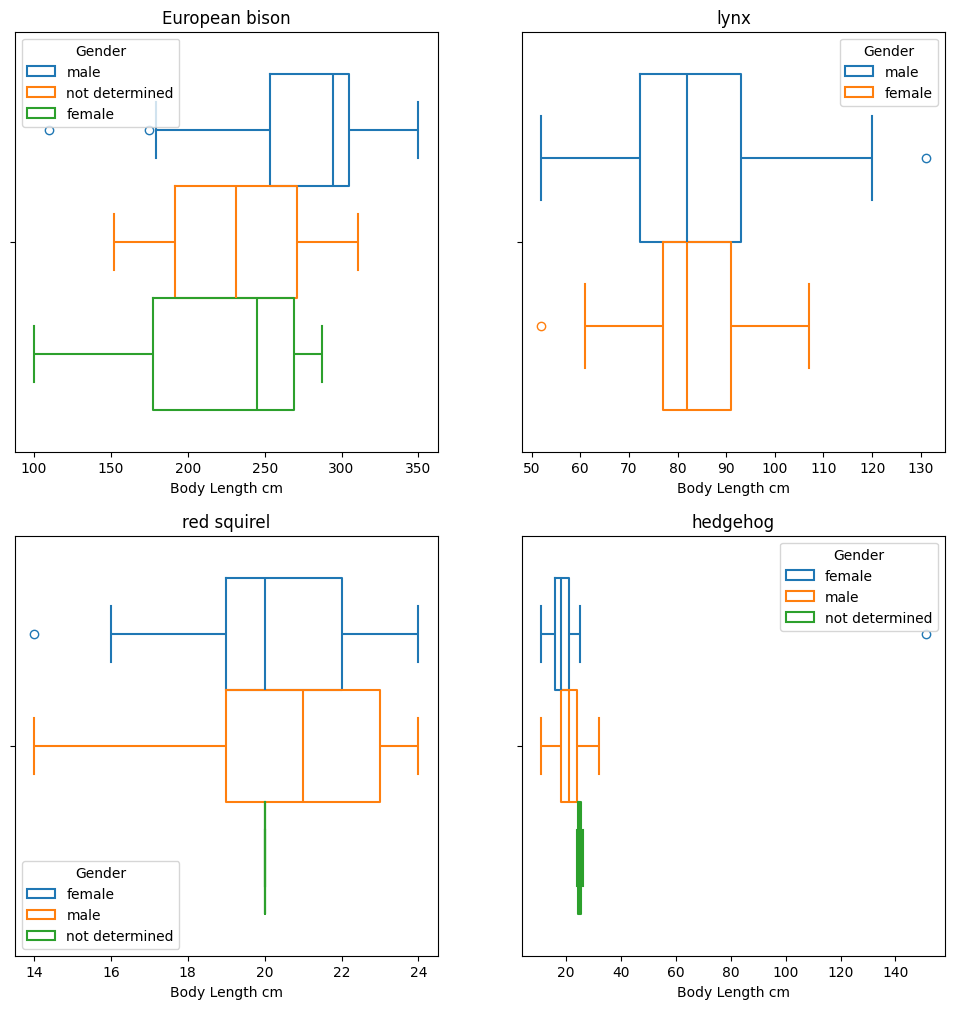

In [20]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title("European bison")
sns.boxplot(data=df[df["Animal type"] == "European bison"], x="Body Length cm", hue="Gender", fill=False)
plt.subplot(2, 2, 2)
plt.title("lynx")
sns.boxplot(data=df[df["Animal type"] == "lynx"], x="Body Length cm", hue="Gender", fill=False)
plt.subplot(2, 2, 3)
plt.title("red squirel")
sns.boxplot(data=df[df["Animal type"] == "red squirel"], x="Body Length cm", hue="Gender", fill=False)
plt.subplot(2, 2, 4)
plt.title("hedgehog")
sns.boxplot(data=df[df["Animal type"] == "hedgehog"], x="Body Length cm", hue="Gender", fill=False)
plt.show()

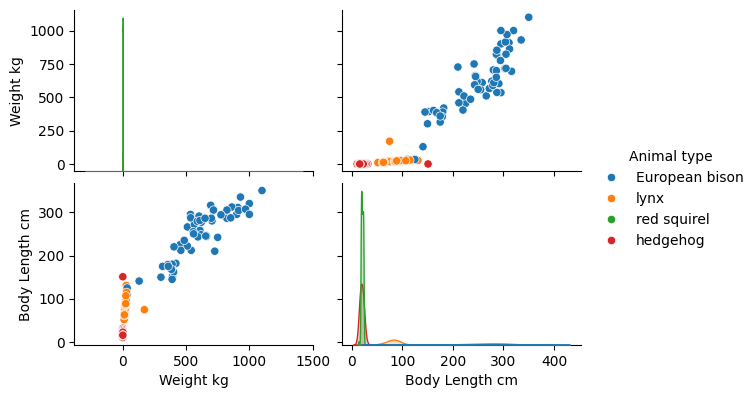

In [21]:
sns.pairplot(df, vars=["Weight kg", "Body Length cm"], hue="Animal type", height=2, aspect=1.5)

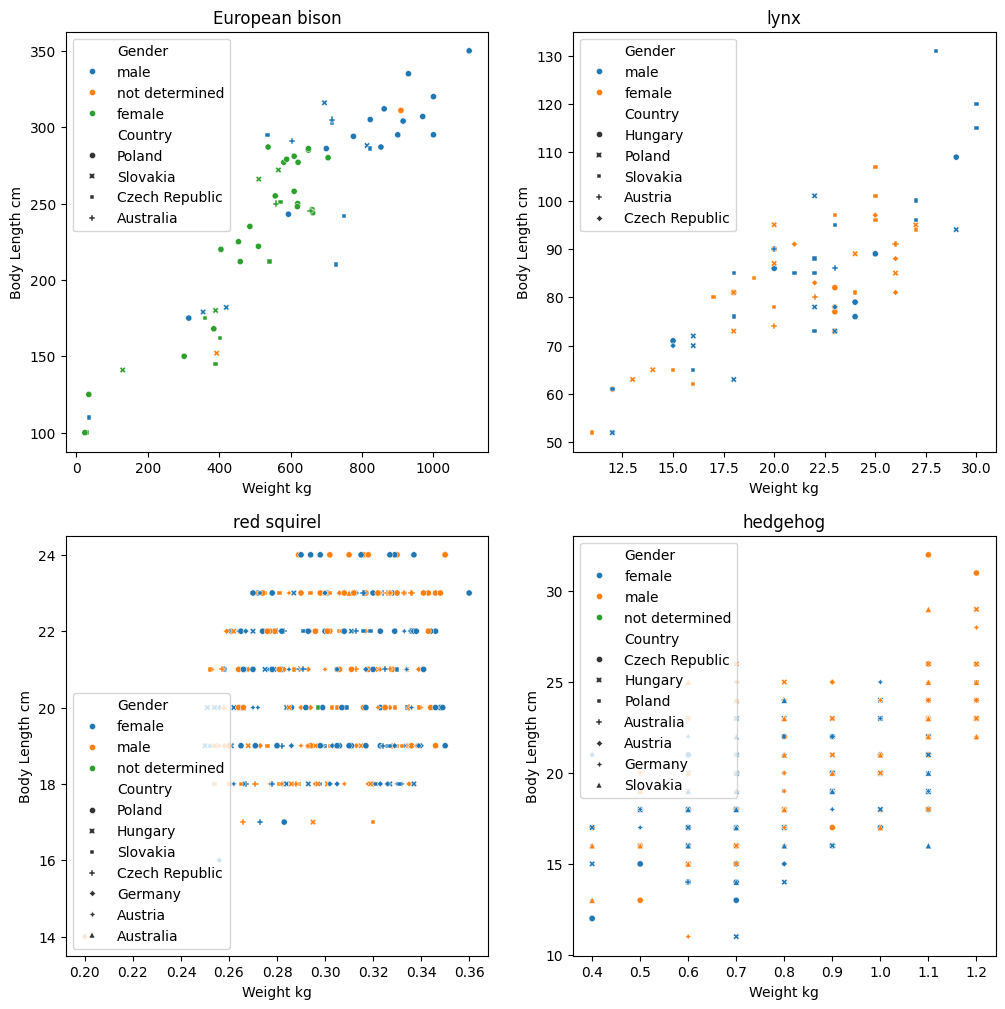

In [38]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title("European bison")
sns.scatterplot(data=df[df["Animal type"] == "European bison"], x="Weight kg", y="Body Length cm", hue="Gender", style="Country", s=20)
plt.subplot(2, 2, 2)
plt.title("lynx")
sns.scatterplot(data=df[df["Animal type"] == "lynx"], x="Weight kg", y="Body Length cm", hue="Gender", style="Country", s=20)
plt.subplot(2, 2, 3)
plt.title("red squirel")
sns.scatterplot(data=df[df["Animal type"] == "red squirel"], x="Weight kg", y="Body Length cm", hue="Gender", style="Country", s=20)
plt.subplot(2, 2, 4)
plt.title("hedgehog")
sns.scatterplot(data=df[df["Animal type"] == "hedgehog"], x="Weight kg", y="Body Length cm", hue="Gender", style="Country", s=20)
plt.show()

### Geo-visualization

In [23]:
map = folium.Map(location=[54, 18], zoom_start=4)
for i, row in df.iterrows():
    if row["Animal type"]=="red squirrel":
        folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row["Animal type"],icon=folium.Icon(color='orange')).add_to(map)
    elif row["Animal type"]=="hedgehog":
        folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row["Animal type"],icon=folium.Icon(color='lightgray')).add_to(map)
    elif row["Animal type"]=="lynx":
        folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row["Animal type"],icon=folium.Icon(color='blue')).add_to(map)
    else:
        folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row["Animal type"],icon=folium.Icon(color='black')).add_to(map)
folium.plugins.Geocoder().add_to(map)
map

In [24]:
map2 = Map(location=[54, 18], title='cartodbpositron', zoom_start=6)
HeatMap(data=df[['Latitude', 'Longitude']], radius=10).add_to(map2)
map2

In [25]:
animal_summary = df.groupby(["Country"]).agg(Observations_by_country=("Country","count"))
animal_summary = animal_summary.reset_index()
animal_summary

,Country,Observations_by_country
0,Australia,8
1,Austria,66
2,Czech Republic,112
3,Germany,107
4,Hungary,113
5,Poland,183
6,Slovakia,150


In [26]:
countries_geojson_url = ("http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)
map3 = folium.Map(location=(50, 10), zoom_start=6, tiles="cartodb positron")
folium.Choropleth(
    geo_data=countries_geojson_url,
    data=animal_summary,
    columns=["Country", "Observations_by_country"],
    key_on="feature.properties.name_long",
    fill_color="RdYlGn_r",
    nan_fill_color="white",
    legend_name="Animals spotted by country"
).add_to(map)

map3

In [27]:
map.save('map_with_tooltips.html')

## Data cleaning

In [28]:
mask = (df["Animal type"] == "lynx") & (df["Weight kg"] > 100)
df = df.drop(df[mask].index)
mask = (df["Animal type"] == "hedgehog") & (df["Body Length cm"] > 100)
df = df.drop(df[mask].index)

df.to_csv("wrecked_data/animal_data_clean.csv", index=False)
